### Install 

In [1]:
pip install catboost

     |████████████████████████████████| 76.3 MB 45 kB/s 


In [2]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
import time
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from imblearn.over_sampling import SMOTENC

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/My Drive/Colab Notebooks/Newi/2021Project3/Dataup'

ls: cannot access '/content/drive/My Drive/Colab Notebooks/Newi/2021Project3/Dataup': No such file or directory


In [6]:
%cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project2

/content/drive/My Drive/Colab Notebooks/Newi/2021Project2


In [7]:
!ls

all_data.csv   Data	feaure_pics			      result_model17
attacks        df2.csv	importance_list_all_data.csv	      results
catboost_info  df3.csv	importance_list_for_attack_files.csv  SubProject
Code	       df4.csv	result_model


# Stage One

### 1. Preprocessing Dataset 


In [ ]:
import time
tic = time.perf_counter()

toc = time.perf_counter()
print(f"Downloaded the tutorial in {toc - tic:0.6f} seconds")


Downloaded the tutorial in 0.000018 seconds


In [ ]:
import time
tic = time.perf_counter()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from imblearn.over_sampling import SMOTENC


seconds=time.time()#time stamp for all processing time
print("Total operation time: = ",time.time()- seconds ,"seconds")

Total operation time: =  2.6941299438476562e-05 seconds


In [ ]:
# csv_files = glob.glob(os.path.join(dataset_base_path, '*.csv'))
# df = load_dataset(csv_files, types)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
 %cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project2

/content/drive/My Drive/Colab Notebooks/Newi/2021Project2


In [ ]:
!ls

all_data.csv   Data	    importance_list_all_data.csv	  results
attacks        df3.csv	    importance_list_for_attack_files.csv  SubProject
catboost_info  df4.csv	    result_model
Code	       feaure_pics  result_model17


In [ ]:
start = time.perf_counter()

df = pd.read_csv("all_data.csv")

end = time.perf_counter()
print(f"Operation Time in {end - start:0.6f} seconds")

Operation Time in 20.783561 seconds


In [ ]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
# Drop last column of a dataframe | 
df = df.iloc[: , :-1] 

In [ ]:
df.head(1)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,228571,7953,80,2751,49188,6,12231,4,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,3000000.0,500000.0,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.Label.value_counts() 

BENIGN              2019813
DoS Hulk             231073
PortScan             158930
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
df.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.917175,0.965404,0.001221,0.283696,0.750561,0.352941,0.470477,1.416667e-07,0.000005,0.0,9.302326e-07,0.0,0.000242,0.002581,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.416667e-07,0.0,1.416667e-07,1.500000e-07,3.333333e-08,3.333333e-08,0.0,3.333333e-08,9.999999e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004144,0.000242,0.001798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.0,0.0,0.005035,0.0,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,0.917175,0.965404,0.001221,0.283696,0.750561,0.352941,0.470477,1.166667e-07,0.000005,0.0,9.302326e-07,0.0,0.000242,0.002581,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.166667e-07,0.0,1.166667e-07,1.250000e-07,8.333333e-09,8.333333e-09,0.0,8.333333e-09,7.500000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004144,0.000242,0.001798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.002312,0.00101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,9.323764e-07,0.0,0.0,0.005035,0.0,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Labelencoder 
labelencoder = preprocessing.LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
X = df.drop(columns=['Label'])
y = df.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)

In [ ]:
stats = X.describe()
std = stats.loc['std']
features_no_variance = std[std == 0.0].index
pd.Series(features_no_variance).sort_values() 

9       Bwd Avg Bulk Rate
7      Bwd Avg Bytes/Bulk
8    Bwd Avg Packets/Bulk
2           Bwd PSH Flags
3           Bwd URG Flags
0            Flow Bytes/s
1          Flow Packets/s
6       Fwd Avg Bulk Rate
4      Fwd Avg Bytes/Bulk
5    Fwd Avg Packets/Bulk
dtype: object

In [ ]:
features_no_variance = ['Bwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk',
                        'Bwd PSH Flags','Bwd URG Flags','Flow Bytes/s','Flow Packets/s', 
                        'Fwd Avg Bulk Rate','Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk'
                        ]

In [ ]:
X = X.drop(columns=features_no_variance) # No Variance
X = X.drop(columns=['Timestamp']) 

In [ ]:
df.shape

(2447252, 84)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
pd.Series(y).value_counts()

0     2019813
3      231073
9      158930
2       10293
6        7938
10       5897
5        5796
4        5499
1        1966
8          36
7          11
dtype: int64

In [ ]:
print (X_train.shape ,y_train.shape, X_test.shape, y_test.shape)

(1957801, 72) (1957801,) (489451, 72) (489451,)


In [ ]:
# = col_train = list(X_train.columns)
cols = list(X_train.head(0)) # Save name features in variable  
cols[2]

'Source Port'

In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(n_jobs = -1,sampling_strategy = {7:300})
X, y = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(n_jobs = -1,sampling_strategy = {8:300})
X, y = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y).value_counts()

0     2019813
3      231073
9      158930
2       10293
6        7938
10       5897
5        5796
4        5499
1        1966
8         300
7         300
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y)


### Concate and Save data in Drive

In [ ]:
X_train  = pd.DataFrame(X_train , columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

X = pd.concat([X_train, X_test], axis=0)

print (X.isnull().sum().sum())
print(X.index.is_unique)
print (X.shape)

In [ ]:
y_train  = pd.DataFrame(y_train, columns = ['label'])
y_test  = pd.DataFrame(y_test, columns = ['label'])

y = pd.concat([y_train, y_test], axis=0)

print (y.isnull().sum().sum())
print(y.index.is_unique)
print (y.shape)

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
df2 = pd.concat([X, y], axis=1)

print(df.index.is_unique, X.index.is_unique, y.index.is_unique)
print(y.shape)

In [10]:
%cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project2
!ls

/content/drive/My Drive/Colab Notebooks/Newi/2021Project2
all_data.csv   Data	feaure_pics			      result_model17
attacks        df2.csv	importance_list_all_data.csv	      results
catboost_info  df3.csv	importance_list_for_attack_files.csv  SubProject
Code	       df4.csv	result_model


In [ ]:
df2.to_csv("df2.csv", index = False)

In [12]:
df2 = pd.read_csv("df2.csv")
df2.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,0.153391,0.274824,0.927703,0.282665,0.000809,1.000000,0.211456,0.000009,0.000010,0.000014,6.133163e-07,0.003425,0.018925,0.010436,0.00294,0.010906,0.032113,0.030659,0.01019,0.042291,0.107761,0.175921,0.000257,0.210932,0.105466,0.141841,0.176178,3.475438e-02,0.211198,0.105599,0.142422,0.176445,0.034753,0.0,0.0,0.999856,0.994592,3.940936e-08,5.911404e-08,0.030387,0.008582,0.02881,0.011685,0.000136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00641,0.02881,0.010436,0.030659,0.000009,0.000014,0.000010,6.133163e-07,0.000000,0.000000,0.000009,1.0,0.038194,0.0,0.038194,0.038194,0.175921,0.0,0.175921,0.175921,0
1,0.024377,0.260864,0.101106,0.165824,0.006760,0.352941,0.000047,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000047,0.000000,0.000047,0.000047,0.000000,0.000000,0.000000,0.000000,6.666666e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.999856,0.994592,5.947071e-05,8.920607e-05,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00641,0.00000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000015,0.000015,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0


In [13]:
X2 = df2.drop(columns=['label'])
y2 = df2.iloc[:, -1].values.reshape(-1,1)
y2 = np.ravel(y2)

In [14]:
#X2 = pd.DataFrame(X_test,columns = cols) ; y2 = y_test # Save X as df and y as array

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y2)

In [15]:
X2.columns[2]

'Source Port'

In [16]:
X2.head(0)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min


In [17]:
X2.shape

(2447805, 72)

In [18]:
X_train2.shape

(1958244, 72)

In [19]:
print (type(X_train2),type(X_test2),type(y_train2),type(y_test2),type(y2),type(X2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [20]:
X2.head(1)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.153391,0.274824,0.927703,0.282665,0.000809,1.0,0.211456,0.000009,0.00001,0.000014,6.133163e-07,0.003425,0.018925,0.010436,0.00294,0.010906,0.032113,0.030659,0.01019,0.042291,0.107761,0.175921,0.000257,0.210932,0.105466,0.141841,0.176178,0.034754,0.211198,0.105599,0.142422,0.176445,0.034753,0.0,0.0,0.999856,0.994592,3.940936e-08,5.911404e-08,0.030387,0.008582,0.02881,0.011685,0.000136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00641,0.02881,0.010436,0.030659,0.000009,0.000014,0.00001,6.133163e-07,0.0,0.0,0.000009,1.0,0.038194,0.0,0.038194,0.038194,0.175921,0.0,0.175921,0.175921


In [21]:
X_train2.head(1)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
286424,0.540504,0.274338,0.158145,0.283593,0.000809,1.0,0.000259,0.000005,0.000007,0.000006,1.678229e-07,0.001571,0.016774,0.006565,0.0,0.002816,0.018992,0.012584,0.0,0.000086,0.000211,0.000259,1.416667e-07,2.500000e-08,2.500000e-08,0.0,2.500000e-08,9.166666e-08,2.500000e-08,2.500000e-08,0.0,2.500000e-08,2.500000e-08,0.0,0.0,0.999856,0.994592,0.000021,0.000032,0.026934,0.002216,0.013604,0.001861,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00641,0.014576,0.006565,0.012584,0.000005,0.000006,0.000007,1.678229e-07,0.0,0.0,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test2,y_test2, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y_test2)

In [23]:
# We have now, Small Datafram len(400,000) After First Split we making SMOTE and then doing Second Split and after That making SMOTE ENN
# First Split - SMOTE - Second Split - SMOTE ENN 

In [24]:
# I reduced the size of the dataframe while preserving all type of attacks, including the few attacks like Infiltration, Heartbleed. 
# This is done by making an SMOTE after the first separation process for the small elements, which are the number (8,7) to 300 elements, 
# And then making a separation again for the data to doing SMOTE ENN beacuse SMOTE ENN remove auto any very low element 

### 2. Pre-Model

In [34]:
def report_acc (model_score, y_true, y_predict):
  print('Accuracy of Model: ' + str(model_score))
  precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
  print('Precision of Model: ' + (str(precision)))
  print('Recall of Model: ' + (str(recall)))
  print('F1-score of Model: ' + (str(fscore)))
  print(classification_report(y_true,y_predict))

  #cm = confusion_matrix(y_true,y_predict)
  #f,ax = plt.subplots(figsize=(8,8))
  #sns.heatmap(cm,annot=True,linewidth = 0.5,linecolor="blue",fmt=".0f",ax=ax)
  #plt.xlabel("y_pred")
  #plt.ylabel("y_true")
  #plt.show()

In [35]:
rf = RandomForestClassifier(random_state = 0)
xg = xgb.XGBClassifier(n_estimators = 10)
cat = CatBoostClassifier()
light = lgb.LGBMClassifier()

def build_model (model,X_train,y_train,X_test,y_test):
    start = time.perf_counter()

    print(model)
    model.fit(X_train, y_train)

    model_score = model.score(X_test,y_test)
    y_predict = model.predict(X_test)
    y_true = y_test

    report_acc (model_score, y_true, y_predict)

    model_train=model.predict(X_train)
    model_test=model.predict(X_test)

    #start = time.perf_counter()
    print("mission accomplished! ---------------------------------- ")
    end = time.perf_counter()
    print(f"Total Operation Time in {end - start:0.6f} seconds")

In [36]:
def save_model(model,name_model,X_train,y_train,X_test,y_test):
    # Save the model to disk 
    %cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project2/

    filename = name_model + '.sav' ; 
    pickle.dump(model, open('./result_model17/' + filename, 'wb'))
    print("Done save model in drive: " , filename)
    #---------------------------------------------------------------------------
    # Load the model from disk
    loaded_model = pickle.load(open('./result_model17/' + filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    print("Accuracy Model: " , result)
    #---------------------------------------------------------------------------
    train = name_model + 'train'
    train = loaded_model.predict(X_train)
    test = loaded_model.predict(X_test)

    return train, test

In [37]:
#The function below builds the model and returns cross validation scores, train score and learning curve 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

def learn_curve(X,y,c,m):
    
    le = preprocessing.LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y) #Label Encoding the target

    # log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model RandomForestClassifier(random_state = 0)
    model = m

    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc], ['classifier',model]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}

In [38]:
def print_graph (lc):
  
    print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
    Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
    Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
    Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')

    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    plt.title("Learning Curve of Good Fit Model")
    plt.ylabel("Misclassification Rate/Loss");

### 3. Apply Model

In [31]:
build_model(rf,X_train2,y_train2,X_test2,y_test2)
rf_train , rf_test = save_model(rf,'rf_model',X_train2,y_train2,X_test2,y_test2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy of Model: 0.9998876553675201
Precision of Model: 0.9998875746470565
Recall of Model: 0.9998876553675201
F1-score of Model: 0.9998834588556013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80793
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00       412
           3       1.00      1.00      1.00      9243
           4       0.99      0.99 

Cross Validation Accuracies:
-------------------------
[0.9998851014936806, 0.9998468019915742, 0.9998212689901698, 0.9997957333809956, 0.9998085000446834]

    Mean Cross Validation Accuracy:
-------------------------
0.9998314811802208

    Standard Deviation of Cross Validation Accuracy:
-------------------------
3.168656447684676e-05

    Training Accuracy:
---------------
1.0




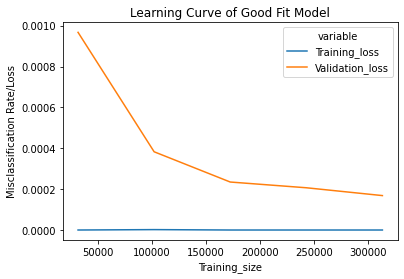

In [32]:
lc = learn_curve(X_train2,y_train2,1,rf) # rf
print_graph(lc)

In [34]:
build_model(xg,X_train2,y_train2,X_test2,y_test2) 
xg_train , xg_test = save_model(xg,'xg_model',X_train2,y_train2,X_test2,y_test2) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy of Model: 0.9918192681257851
Precision of Model: 0.9918037097707886
Recall of Model: 0.9918192681257851
F1-score of Model: 0.991067727055557
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     80793
           1       1.00      0.13      0.22        79
           2       0.99      0.64      0.78       412
           3       0.98      0.96      0.97      9243
           4       0.99      0.68      0.81       220
           5       1.00      0.50      0.67       232
  

Cross Validation Accuracies:
-------------------------
[0.9917145410442998, 0.9921486020681731, 0.9915230435337674, 0.9921102018409529, 0.9920208351951385]

    Mean Cross Validation Accuracy:
-------------------------
0.9919034447364663

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00024372969341524982

    Training Accuracy:
---------------
0.9919621701119372




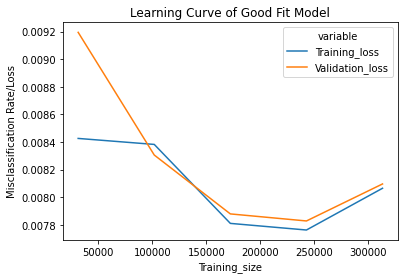

In [35]:
lc = learn_curve(X_train2,y_train2,1,xg) # xg
print_graph(lc)

In [36]:
build_model(cat,X_train2, y_train2, X_test2, y_test2) 
cat_train , cat_test = save_model(cat,'cat_model', X_train2, y_train2, X_test2, y_test2)

Learning rate set to 0.10729
0:	learn: 1.4471649	total: 4.01s	remaining: 1h 6m 50s
1:	learn: 1.1382463	total: 7.67s	remaining: 1h 3m 49s
2:	learn: 0.9369708	total: 11.3s	remaining: 1h 2m 39s
3:	learn: 0.7906477	total: 14.9s	remaining: 1h 1m 47s
4:	learn: 0.6759696	total: 18.5s	remaining: 1h 1m 12s
5:	learn: 0.5846000	total: 22.1s	remaining: 1h 1m 5s
6:	learn: 0.5112324	total: 25.7s	remaining: 1h 46s
7:	learn: 0.4500355	total: 29.4s	remaining: 1h 43s
8:	learn: 0.3979586	total: 33s	remaining: 1h 37s
9:	learn: 0.3528023	total: 36.6s	remaining: 1h 26s
10:	learn: 0.3141936	total: 40.2s	remaining: 1h 17s
11:	learn: 0.2800862	total: 43.9s	remaining: 1h 11s
12:	learn: 0.2512284	total: 47.5s	remaining: 1h 8s
13:	learn: 0.2256881	total: 51.1s	remaining: 59m 59s
14:	learn: 0.2035781	total: 54.7s	remaining: 59m 51s
15:	learn: 0.1838986	total: 58.3s	remaining: 59m 43s
16:	learn: 0.1665559	total: 1m 1s	remaining: 59m 34s
17:	learn: 0.1507254	total: 1m 5s	remaining: 59m 28s
18:	learn: 0.1367631	total

In [ ]:
lc = learn_curve(X_train2,y_train2,1,cat) # cat
print_graph(lc)

Learning rate set to 0.106076
0:	learn: 1.4510036	total: 3.22s	remaining: 53m 38s
1:	learn: 1.1433927	total: 6.2s	remaining: 51m 32s
2:	learn: 0.9427470	total: 9.14s	remaining: 50m 36s
3:	learn: 0.7970201	total: 12s	remaining: 49m 55s
4:	learn: 0.6818186	total: 14.9s	remaining: 49m 30s
5:	learn: 0.5908083	total: 17.8s	remaining: 49m 15s
6:	learn: 0.5170129	total: 20.7s	remaining: 49m 3s
7:	learn: 0.4550340	total: 23.6s	remaining: 48m 51s
8:	learn: 0.4023069	total: 26.6s	remaining: 48m 48s
9:	learn: 0.3577296	total: 29.6s	remaining: 48m 47s
10:	learn: 0.3189705	total: 32.5s	remaining: 48m 39s
11:	learn: 0.2846542	total: 35.4s	remaining: 48m 34s
12:	learn: 0.2555189	total: 38.4s	remaining: 48m 32s
13:	learn: 0.2299385	total: 41.2s	remaining: 48m 23s
14:	learn: 0.2075752	total: 44.1s	remaining: 48m 12s
15:	learn: 0.1875280	total: 46.9s	remaining: 48m 6s
16:	learn: 0.1698713	total: 49.8s	remaining: 47m 59s
17:	learn: 0.1541880	total: 52.7s	remaining: 47m 54s
18:	learn: 0.1398149	total: 55.

In [31]:
build_model(light,X_train2,y_train2,X_test2,y_test2) 
light_train , light_test = save_model(light,'light_model',X_train2,y_train2,X_test2,y_test2)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Accuracy of Model: 0.9287020109689214
Precision of Model: 0.9511934877200141
Recall of Model: 0.9287020109689214
F1-score of Model: 0.9391738341119619
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     80793
           1       0.58      0.24      0.34        79
           2       0.39      0.68      0.50       412
           3       0.68      0.70      0.69      9243
           4       1.00      0.48      0.65       220
           5       0.04      0.05      0.04       232
           

Cross Validation Accuracies:
-------------------------
[0.9814375079790629, 0.8753478871441338, 0.9745435975998978, 0.9046074889249193, 0.8928876916595386]

    Mean Cross Validation Accuracy:
-------------------------
0.9257648346615104

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.04370176810080339

    Training Accuracy:
---------------
0.9817310442029578




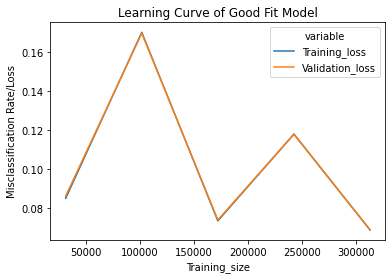

In [33]:
lc = learn_curve(X_train2,y_train2,1000,light) # light
print_graph(lc)

# Stage Two

### 4. Features Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=250,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

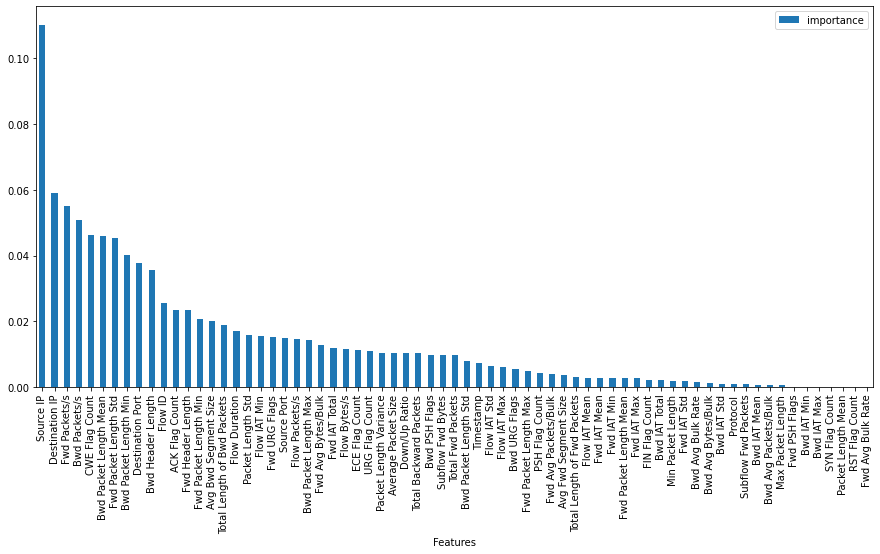

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
refclasscol=list(df.columns.values)
impocol = pd.DataFrame({'Features':refclasscol[0:69],'importance':importances[0:69]})
impocol = impocol.sort_values('importance',ascending=False).set_index('Features')

plt.rcParams['figure.figsize'] = (15, 7)
impocol.plot.bar();

In [ ]:
impocol.head(55)

,importance
Features,
Source IP,0.110310
Destination IP,0.058996
Fwd Packets/s,0.055146
Bwd Packets/s,0.050773
CWE Flag Count,0.046334
Bwd Packet Length Mean,0.045810
Fwd Packet Length Std,0.045281
Bwd Packet Length Min,0.040161
Destination Port,0.037626


In [ ]:
len(impocol)

69

In [ ]:
impocol.tail(14) # 69 - 14 = 55  ## features < 0.001000 you will delete

,importance
Features,
Bwd Avg Bulk Rate,1.472551e-03
Subflow Fwd Packets,1.028609e-03
Bwd IAT Mean,8.780293e-04
Max Packet Length,8.368932e-04
Protocol,6.496581e-04
Bwd IAT Std,6.196389e-04
Bwd Avg Packets/Bulk,5.426193e-04
Fwd PSH Flags,2.163961e-05
Bwd IAT Max,7.672227e-06


In [ ]:
# notimportant = ['Bwd Avg Bulk Rate','Subflow Fwd Packets' ,'Bwd IAT Mean', 'Max Packet Length','Protocol', 'Bwd IAT Std', 'Bwd Avg Packets/Bulk' ,
# 'Fwd PSH Flags', 'Bwd IAT Max', 'SYN Flag Count', 'Bwd IAT Min', 'RST Flag Count', 'Packet Length Mean', 'Fwd Avg Bulk Rate'] # last 14 features
# X = X.drop(columns=notimportant) # Not Important Features

In [ ]:
impocol = pd.DataFrame({'Features':refclasscol[0:55],'importance':importances[0:55]}) # we will selected 55 features

In [ ]:
implist = impocol['Features']
implist.values.tolist()

['Flow ID',
 'Source IP',
 'Source Port',
 'Destination IP',
 'Destination Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag 

In [ ]:
implist = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
           'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
           'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
           'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
           'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
           'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
           'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
           'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']

In [ ]:
impocol = implist
print (impocol)

['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH 

In [ ]:
impocol.remove('Bwd URG Flags') # Not in index 
impocol.remove('Flow Bytes/s')      # Not in index 
impocol.remove('Timestamp')     # Not in index 
impocol.remove('Bwd PSH Flags') # Not in index 
impocol.remove('Flow Packets/s') # Not in index 

In [ ]:
X_new = X2[impocol]
print("Remaining amount of features:" , {len(X_new.columns)})

Remaining amount of features: {50}


In [ ]:
X_new.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag C

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new,y2 , train_size = 0.5, test_size = 0.5, random_state = 0, stratify = y2)

In [ ]:
print (X_new.shape, y2.shape, X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(489561, 50) (489561,) (244780, 50) (244781, 50) (244780,) (244781,)


#### Concate and Save data in Drive

In [ ]:
# X_train3  X_test3 - y_train3 - y_test3 << X_new - y2
print (type(X_new),type(y2)) 
print (type(X_train3), type(X_test3), type(y_train3), type(y_test3))

In [ ]:
y_new = pd.DataFrame(y2,columns =['label'])
y_new.head(0)

,label


In [35]:
!ls

all_data.csv   Data	feaure_pics			      result_model17
attacks        df2.csv	importance_list_all_data.csv	      results
catboost_info  df3.csv	importance_list_for_attack_files.csv  SubProject
Code	       df4.csv	result_model


In [37]:
df3 = pd.concat([X_new, y_new], axis=1) 
df3.to_csv("df3.csv", index = False)
df3.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,label
0,0.073191,0.187181,0.921340,0.195112,0.000809,1.000000,0.000004,0.000000,0.000003,0.000004,1.937591e-07,0.001894,0.020215,0.007911,0.000000,0.006503,0.043854,0.029057,0.000000,0.000004,0.000000,0.000004,3.708333e-06,0.000000,0.000000,0.000000,0.000000,6.666666e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.999856,0.994592,7.733952e-04,1.160093e-03,0.032459,0.005117,0.022075,0.009808,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.010196,0.259893,0.899641,0.142106,0.006760,0.352941,0.048526,0.000027,0.000010,0.000046,2.151184e-07,0.020830,0.000000,0.014404,0.026848,0.007220,0.000000,0.010753,0.012122,0.005392,0.022485,0.047761,5.166666e-07,0.048525,0.008088,0.027917,0.048264,4.666666e-07,0.000637,0.000318,0.000377,0.000506,0.000131,0.0,0.0,0.999856,0.994592,4.007060e-07,2.575967e-07,0.000000,0.020830,0.020159,0.032964,0.001085,0.0,0.0,0.0,1.0,0.0,0.0,0


In [36]:
df3 = pd.read_csv("df3.csv")

X3 = df3.drop(columns=['label'])
y3 = df3.iloc[:, -1].values.reshape(-1,1)
y3 = np.ravel(y3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y3)

In [ ]:
# X_train3  X_test3 - y_train3 - y_test3 << X_new - y_new << df_new

### 5. SMOTE ENN

In [ ]:
pd.Series(y_train3).value_counts()

0     201981
3      23107
9      15893
2       1029
6        793
10       590
5        580
4        550
1        197
8         30
7         30
dtype: int64

In [ ]:
#from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTEENN 
smenn = SMOTEENN()

In [ ]:
low = [7,8,1,4,5,10,6,2]
for i in low:
  print (i , ' ---------------------------------------------')
  smote = SMOTEENN(sampling_strategy = {i:15000})  
  X_train3, y_train3 = smote.fit_sample(X_train3, y_train3)

7  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

8  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

4  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

5  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

10  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

6  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

2  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pd.Series(y_train3).value_counts()

0     201733
3      23086
9      15883
10     15000
8      15000
7      15000
6      15000
5      15000
4      15000
2      15000
1      15000
dtype: int64

In [ ]:
pd.Series(y_test3).value_counts()

0     201982
3      23108
9      15893
2       1030
6        794
10       589
5        579
4        550
1        196
8         30
7         30
dtype: int64

#### Concate and Save data in Drive

In [ ]:
X2 = pd.DataFrame(X_test,columns = cols)

In [ ]:
print (type(X_train3), type(X_test3), type(y_train3), type(y_test3))
print ("------------------------")
print (len(cols), len(impocol), X_train3.shape)

In [ ]:
X_train3.shape

In [ ]:
X_train3  = pd.DataFrame(X_train3, columns = impocol)

y_train3  = pd.DataFrame(y_train3, columns = ['label'])
y_test3  = pd.DataFrame(y_test3, columns = ['label'])

In [ ]:
print (type(X_train3), type(X_test3), type(y_train3), type(y_test3))

In [ ]:
# X_train3  X_test3 - y_train3 - y_test3 << X_new - y_new << df_new
 
train4 = pd.concat([X_train3, y_train3], axis=1)
test4 = pd.concat([X_test3, y_test3], axis=1)

df4 = pd.concat([train4, test4], axis=0)

df4.to_csv("df4.csv", index = False)
df4.head(2)

In [ ]:
X4 = pd.concat([X_train3, X_test3], axis=0)
y4 = pd.concat([y_train3, y_test3], axis=0)

In [ ]:
X4.head(0)

In [ ]:
# X_train4  X_test4 - y_train4 - y_test4 << X4 - y4 << df4

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y4)

In [ ]:
print (X_train4.shape , X_train3.shape)
print (X_test4.shape , y_test3.shape)

In [ ]:
No4 = 484386 + 121097
No3 = 360702 + 244781
print(No3,No4)

### 6. Pre Model New

In [29]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [30]:
rf = RandomForestClassifier(random_state = 0)
xg = xgb.XGBClassifier(n_estimators = 10)
cat = CatBoostClassifier()
light = lgb.LGBMClassifier()

def build_model_new (model,X_train4,y_train4, X_test4,y_test4):
    print(model)
    model.fit(X_train4, y_train4)

    model_score = model.score(X_test4,y_test4)
    y_predict = model.predict(X_test4)
    y_true = y_test4

    report_acc (model_score, y_true, y_predict)

    model_train=model.predict(X_train4)
    model_test=model.predict(X_test4)

In [31]:
def save_model_new (model,name_model,X_train4,y_train4, X_test4,y_test4):
    # Save the model to disk 
    %cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project3/

    filename = name_model + '.sav' ; 
    pickle.dump(model, open('./result_model/' + filename, 'wb'))
    print("Done save model in drive: " , filename)
    #---------------------------------------------------------------------------
    # Load the model from disk
    loaded_model = pickle.load(open('./result_model/' + filename , 'rb'))
    result = loaded_model.score(X_test4, y_test4)
    print("Accuracy Model: " , result)
    #---------------------------------------------------------------------------
    train = name_model + 'train'
    train = loaded_model.predict(X_train4)
    test = loaded_model.predict(X_test4)

    return train, test

In [32]:
def report_acc (model_score, y_true, y_predict):
  print('Accuracy of Model: ' + str(model_score))
  precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
  print('Precision of Model: ' + (str(precision)))
  print('Recall of Model: ' + (str(recall)))
  print('F1-score of Model: ' + (str(fscore)))
  print(classification_report(y_true,y_predict))

  #cm = confusion_matrix(y_true,y_predict)
  #f,ax = plt.subplots(figsize=(8,8))
  #sns.heatmap(cm,annot=True,linewidth = 0.5,linecolor="blue",fmt=".0f",ax=ax)
  #plt.xlabel("y_pred")
  #plt.ylabel("y_true")
  #plt.show()

### 7. Apply Model New

In [38]:
!ls

all_data.csv   Data	feaure_pics			      result_model17
attacks        df2.csv	importance_list_all_data.csv	      results
catboost_info  df3.csv	importance_list_for_attack_files.csv  SubProject
Code	       df4.csv	result_model


In [39]:
df4 = pd.read_csv("df4.csv")

In [40]:
X4 = df4.drop(columns=['label'])
y4 = df4.iloc[:, -1].values.reshape(-1,1)
y4 = np.ravel(y4)

In [41]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y4)

In [42]:
build_model(rf,X_train4,y_train4,X_test4,y_test4) # Old Acc 0.9733
rf_train_new , rf_test_new = save_model(rf,'rf_model_new',X_train4,y_train4,X_test4,y_test4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy of Model: 1.0
Precision of Model: 1.0
Recall of Model: 1.0
F1-score of Model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80693
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      9235
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1

Cross Validation Accuracies:
-------------------------
[1.0, 1.0, 0.9999913363656053, 1.0, 1.0]

    Mean Cross Validation Accuracy:
-------------------------
0.999998267273121

    Standard Deviation of Cross Validation Accuracy:
-------------------------
3.4654537578671097e-06

    Training Accuracy:
---------------
1.0




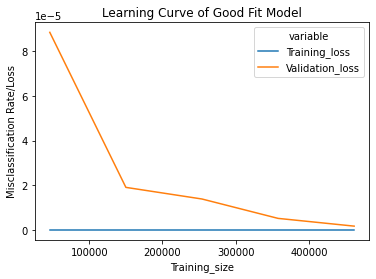

In [43]:
lc = learn_curve(X_train4,y_train4,1,rf) # rf
print_graph(lc)

In [44]:
build_model(xg,X_train4,y_train4,X_test4,y_test4) # Old Acc 0.9595
xg_train_new , xg_test_new = save_model(xg,'xg_model_new', X_train4, y_train4, X_test4, y_test4)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy of Model: 0.980482530617337
Precision of Model: 0.9809788550424713
Recall of Model: 0.980482530617337
F1-score of Model: 0.9800506106381022
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     80693
           1       1.00      1.00      1.00      6000
           2       0.92      0.99      0.95      6000
           3       1.00      0.88      0.93      9235
           4       0.98      0.89      0.94      6000
           5       0.99      0.86      0.92      6000
   

Cross Validation Accuracies:
-------------------------
[0.9829932856833442, 0.9802122590426684, 0.9795191682910981, 0.9795363182700305, 0.9806799279179373]

    Mean Cross Validation Accuracy:
-------------------------
0.9805881918410158

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0012793331643246256

    Training Accuracy:
---------------
0.9798535147620178




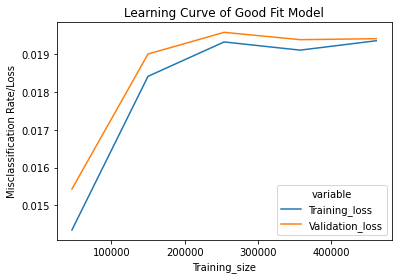

In [45]:
lc = learn_curve(X_train4,y_train4,1,xg) # xg
print_graph(lc)

In [46]:
build_model(cat, X_train4, y_train4, X_test4, y_test4) # Old Acc 0.9777
cat_train_new , cat_test_new = save_model(cat,'cat_model_new',X_train4, y_train4, X_test4, y_test4)

Learning rate set to 0.109433
0:	learn: 1.5896787	total: 404ms	remaining: 6m 43s
1:	learn: 1.2895065	total: 729ms	remaining: 6m 3s
2:	learn: 1.1063255	total: 1.06s	remaining: 5m 52s
3:	learn: 0.9456697	total: 1.37s	remaining: 5m 41s
4:	learn: 0.8246961	total: 1.69s	remaining: 5m 35s
5:	learn: 0.7300587	total: 2s	remaining: 5m 30s
6:	learn: 0.6532578	total: 2.32s	remaining: 5m 29s
7:	learn: 0.5842250	total: 2.63s	remaining: 5m 26s
8:	learn: 0.5284700	total: 2.95s	remaining: 5m 25s
9:	learn: 0.4800053	total: 3.26s	remaining: 5m 22s
10:	learn: 0.4361234	total: 3.56s	remaining: 5m 20s
11:	learn: 0.3999116	total: 3.9s	remaining: 5m 20s
12:	learn: 0.3675803	total: 4.21s	remaining: 5m 19s
13:	learn: 0.3355330	total: 4.52s	remaining: 5m 18s
14:	learn: 0.3118403	total: 4.83s	remaining: 5m 17s
15:	learn: 0.2836444	total: 5.16s	remaining: 5m 17s
16:	learn: 0.2586878	total: 5.49s	remaining: 5m 17s
17:	learn: 0.2377054	total: 5.8s	remaining: 5m 16s
18:	learn: 0.2235308	total: 6.09s	remaining: 5m 14

Streaming output truncated to the last 5000 lines.
21:	learn: 0.2143703	total: 729ms	remaining: 32.4s
22:	learn: 0.2000355	total: 762ms	remaining: 32.4s
23:	learn: 0.1853089	total: 796ms	remaining: 32.4s
24:	learn: 0.1747110	total: 830ms	remaining: 32.4s
25:	learn: 0.1655434	total: 863ms	remaining: 32.3s
26:	learn: 0.1546655	total: 897ms	remaining: 32.3s
27:	learn: 0.1469598	total: 931ms	remaining: 32.3s
28:	learn: 0.1364794	total: 967ms	remaining: 32.4s
29:	learn: 0.1298665	total: 1s	remaining: 32.4s
30:	learn: 0.1231851	total: 1.03s	remaining: 32.4s
31:	learn: 0.1173375	total: 1.07s	remaining: 32.3s
32:	learn: 0.1114153	total: 1.1s	remaining: 32.3s
33:	learn: 0.1036263	total: 1.13s	remaining: 32.2s
34:	learn: 0.0968459	total: 1.17s	remaining: 32.2s
35:	learn: 0.0916774	total: 1.2s	remaining: 32.1s
36:	learn: 0.0862330	total: 1.23s	remaining: 32.1s
37:	learn: 0.0818830	total: 1.27s	remaining: 32.1s
38:	learn: 0.0781269	total: 1.3s	remaining: 32.1s
39:	learn: 0.0736236	total: 1.33s	rem

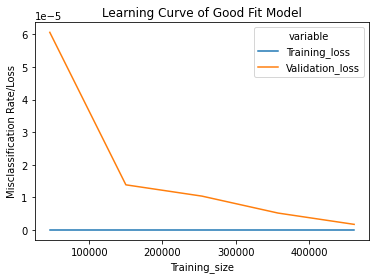

In [47]:
lc = learn_curve(X_train4,y_train4,1,cat) # cat
print_graph(lc)

In [48]:
build_model(light,X_train4,y_train4,X_test4,y_test4) # Old Acc 0.8565
light_train_new , light_test_new = save_model(light,'light_model_new',X_train4,y_train4,X_test4,y_test4)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Accuracy of Model: 1.0
Precision of Model: 1.0
Recall of Model: 1.0
F1-score of Model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80693
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      9235
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7     

Cross Validation Accuracies:
-------------------------
[0.9999826727312108, 1.0, 1.0, 1.0, 1.0]

    Mean Cross Validation Accuracy:
-------------------------
0.999996534546242

    Standard Deviation of Cross Validation Accuracy:
-------------------------
6.93090751568981e-06

    Training Accuracy:
---------------
1.0




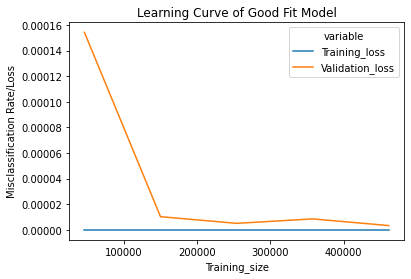

In [49]:
lc = learn_curve(X_train4,y_train4,1,light) # light
print_graph(lc)

# Stage Three

### 8. Pre-Hyperparameter

In [9]:
%cd /content/drive/My Drive/Colab Notebooks/Newi/2021Project2

/content/drive/My Drive/Colab Notebooks/Newi/2021Project2


In [10]:
!ls

all_data.csv   Data	feaure_pics			      result_model17
attacks        df2.csv	importance_list_all_data.csv	      results
catboost_info  df3.csv	importance_list_for_attack_files.csv  SubProject
Code	       df4.csv	result_model


In [11]:
df4 = pd.read_csv("df4.csv")

In [12]:
df4.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,label
0,0.267254,0.259893,0.778927,0.685882,0.001221,0.352941,0.965324,0.000068,0.000048,0.000035,1.493623e-06,0.018050,0.000000,0.004713,0.015718,0.050128,0.000000,0.015999,0.038961,0.033287,0.057607,0.083333,7.749999e-07,0.966667,0.064355,0.049232,0.084167,1.632833e-04,9.250000e-01,7.088340e-02,0.044562,8.416667e-02,3.166667e-06,0.0,0.0,0.999856,0.994592,4.604094e-08,6.042874e-08,0.000000,0.039444,0.013794,0.040543,0.001642,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.440179,0.273974,0.709850,0.283593,0.000809,1.000000,0.000514,0.000005,0.000007,0.000006,5.431358e-07,0.001531,0.016344,0.006396,0.000000,0.009114,0.061464,0.040726,0.000000,0.000172,0.000420,0.000514,1.166667e-07,0.000000,0.000000,0.000000,0.000000,6.666666e-08,2.500000e-08,2.500000e-08,0.000000,2.500000e-08,2.500000e-08,0.0,0.0,0.999856,0.994592,1.080374e-05,1.620562e-05,0.026243,0.007172,0.028168,0.016284,0.000265,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.011950,0.260379,0.770245,0.147778,0.001221,0.352941,0.046144,0.000009,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015381,0.037543,0.046016,5.666666e-07,0.046144,0.023072,0.046023,0.046016,1.279500e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.999856,0.994592,1.805959e-07,9.029797e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0


In [13]:
# X = df.drop(['label'],axis=1).values 
X4 = df4.drop(columns=['label'])
y4 = df4.iloc[:, -1].values.reshape(-1,1)
y4 = np.ravel(y4)

In [14]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4 , y4, train_size = 0.5, test_size = 0.5, random_state = 0, stratify = y4)

In [15]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_train4 , y_train4, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y_train4)

In [16]:
print (X_train5.shape, X_test5.shape)
print (type(X_train5), type(X_test5), type(y_train5),type(y_test5))

(288561, 50) (72141, 50)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
pd.Series(y_train5).value_counts()

0     161386
3      18469
9      12706
10     12000
8      12000
7      12000
6      12000
5      12000
4      12000
2      12000
1      12000
dtype: int64

### 10. Hyperparameter

#### 10.1 RF + Params

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train5,y_train5)

random_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 17.2min finished


{'max_features': 0.30000000000000004, 'n_estimators': 85}

In [ ]:
rf_params = {'max_features': 0.30000000000000004, 'n_estimators': 85}

In [ ]:
#start = time.perf_counter()
#print("mission accomplished! ---------------------------------- ")
#end = time.perf_counter()
#print(f"Total Operation Time in {end - start:0.6f} seconds")

In [24]:
 rf = RandomForestClassifier(max_features = 0.30000000000000004, n_estimators = 85)

build_model (rf, X_train5 , y_train5 , X_test5 , y_test5)
rf_train_param , rf_test_param = save_model(rf,'rf_model_para', X_train5 , y_train5 , X_test5 , y_test5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.30000000000000004, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=85, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy of Model: 1.0
Precision of Model: 1.0
Recall of Model: 1.0
F1-score of Model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40347
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      4617
           4       1.00      1.00      1.00      3000
           5       1.00  

Cross Validation Accuracies:
-------------------------
[1.0, 1.0, 1.0, 1.0, 1.0]

    Mean Cross Validation Accuracy:
-------------------------
1.0

    Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0

    Training Accuracy:
---------------
1.0




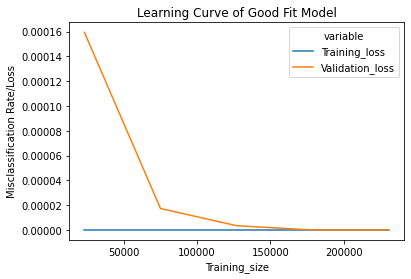

In [25]:
lc = learn_curve(X_train5,y_train5,1,rf) # rf
print_graph(lc)

#### 10.2 XG + Params

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds = 3 ; param_comb = 5
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)

# A Parameter Grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#skf = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 1001)
xgb_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter = param_comb, n_jobs=4, verbose=3, random_state=0)

xgb_search.fit(X_train5,y_train5)
xgb_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 309.0min finished


{'colsample_bytree': 0.8,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.8}

In [ ]:
xgb_search.best_params_

In [ ]:
xg_params = {'colsample_bytree': 0.8,
             'gamma': 2,
             'max_depth': 5,
             'min_child_weight': 5,
             'subsample': 0.8}

In [27]:
xg = XGBClassifier (colsample_bytree = 0.8, gamma = 2 , max_depth = 5, min_child_weight = 5, subsample = 0.8)

build_model(xg, X_train5 , y_train5 , X_test5 , y_test5)
xg_train_param , xg_test_param = save_model(xg,'xg_model_para', X_train5 , y_train5 , X_test5 , y_test5)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
Accuracy of Model: 1.0
Precision of Model: 1.0
Recall of Model: 1.0
F1-score of Model: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40347
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      4617
           4       1.00      1.00      1.00      3000
           5       1.00      1.00      1.00      3000
           6       1.00      1.00      1.00      3000
  

Cross Validation Accuracies:
-------------------------
[0.9999826728813266, 0.9999826725810923, 1.0, 0.9999653451621846, 1.0]

    Mean Cross Validation Accuracy:
-------------------------
0.9999861381249208

    Standard Deviation of Cross Validation Accuracy:
-------------------------
1.2966636942291537e-05

    Training Accuracy:
---------------
1.0




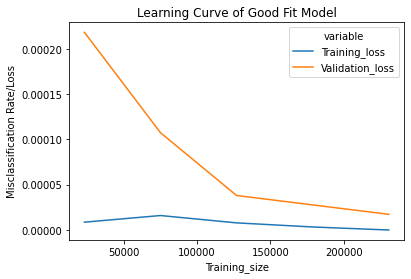

In [28]:
lc = learn_curve(X_train5,y_train5,1,xg) # xg
print_graph(lc)

#### 10.3 Cat + Params

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  

In [ ]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [ ]:
cat = CatBoostClassifier()
parameters = {'depth'         : sp_randInt(4, 10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10, 140)
              }

cat_search = RandomizedSearchCV(estimator=cat, param_distributions = parameters, cv = 2, n_iter = 10, n_jobs=-1)
cat_search.fit(X_train5, y_train5)

0:	learn: 0.5723495	total: 148ms	remaining: 18.2s
1:	learn: 0.3103183	total: 211ms	remaining: 12.9s
2:	learn: 0.2210357	total: 274ms	remaining: 11s
3:	learn: 0.1599248	total: 338ms	remaining: 10.1s
4:	learn: 0.1221271	total: 414ms	remaining: 9.86s
5:	learn: 0.0786619	total: 496ms	remaining: 9.76s
6:	learn: 0.0575211	total: 561ms	remaining: 9.38s
7:	learn: 0.1837767	total: 626ms	remaining: 9.07s
8:	learn: 3.0953808	total: 698ms	remaining: 8.91s
9:	learn: 2.3856565	total: 761ms	remaining: 8.67s
10:	learn: 0.7499253	total: 841ms	remaining: 8.64s
11:	learn: 0.6838542	total: 914ms	remaining: 8.53s
12:	learn: 0.7320825	total: 988ms	remaining: 8.44s
13:	learn: 0.5320514	total: 1.06s	remaining: 8.31s
14:	learn: 0.4725500	total: 1.13s	remaining: 8.23s
15:	learn: 0.5192177	total: 1.19s	remaining: 8.06s
16:	learn: 0.4457070	total: 1.27s	remaining: 7.98s
17:	learn: 0.4335720	total: 1.34s	remaining: 7.87s
18:	learn: 0.4155579	total: 1.4s	remaining: 7.74s
19:	learn: 0.3923972	total: 1.47s	remaining:

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f407d679050>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f407d66ffd0>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f407d679210>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f407d679150>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print ("Best Estimator : " , cat_search.best_estimator_)
print ("Best Params : " , cat_search.best_params_)
print ("Best Score : " , cat_search.best_score_)

Best Estimator :  <catboost.core.CatBoostClassifier object at 0x7f407d698fd0>
Best Params :  {'depth': 5, 'iterations': 124, 'learning_rate': 0.7113033011501018}
Best Score :  0.9999861380648738


In [ ]:
#Best Params :  {'depth': 5, 'iterations': 124, 'learning_rate': 0.7113033011501018}

In [30]:
cat = CatBoostClassifier (depth = 5, iterations = 124 , learning_rate = 0.7113033011501018)

build_model (cat, X_train5 , y_train5 , X_test5 , y_test5)
cat_train_param , cat_test_param = save_model(cat,'cat_model_para', X_train5 , y_train5 , X_test5 , y_test5)

0:	learn: 0.5723495	total: 144ms	remaining: 17.7s
1:	learn: 0.3103183	total: 206ms	remaining: 12.5s
2:	learn: 0.2210357	total: 264ms	remaining: 10.6s
3:	learn: 0.1599248	total: 320ms	remaining: 9.59s
4:	learn: 0.1221271	total: 388ms	remaining: 9.24s
5:	learn: 0.0786619	total: 454ms	remaining: 8.92s
6:	learn: 0.0575211	total: 509ms	remaining: 8.5s
7:	learn: 0.1837767	total: 567ms	remaining: 8.21s
8:	learn: 3.0953808	total: 636ms	remaining: 8.13s
9:	learn: 2.3856565	total: 689ms	remaining: 7.85s
10:	learn: 0.7499253	total: 763ms	remaining: 7.84s
11:	learn: 0.6838542	total: 827ms	remaining: 7.71s
12:	learn: 0.7320825	total: 895ms	remaining: 7.64s
13:	learn: 0.5320514	total: 954ms	remaining: 7.49s
14:	learn: 0.4725500	total: 1.02s	remaining: 7.43s
15:	learn: 0.5192177	total: 1.08s	remaining: 7.32s
16:	learn: 0.4457070	total: 1.15s	remaining: 7.23s
17:	learn: 0.4335720	total: 1.21s	remaining: 7.15s
18:	learn: 0.4155579	total: 1.27s	remaining: 7.03s
19:	learn: 0.3923972	total: 1.33s	remainin

0:	learn: 0.5526446	total: 81.1ms	remaining: 9.98s
1:	learn: 0.2526368	total: 129ms	remaining: 7.88s
2:	learn: 0.1684865	total: 179ms	remaining: 7.21s
3:	learn: 0.1227045	total: 221ms	remaining: 6.63s
4:	learn: 0.0869524	total: 284ms	remaining: 6.76s
5:	learn: 0.0548593	total: 333ms	remaining: 6.54s
6:	learn: 0.0380541	total: 383ms	remaining: 6.41s
7:	learn: 0.0288215	total: 442ms	remaining: 6.4s
8:	learn: 0.0213095	total: 495ms	remaining: 6.32s
9:	learn: 0.0167958	total: 549ms	remaining: 6.26s
10:	learn: 0.0138119	total: 596ms	remaining: 6.12s
11:	learn: 0.0117023	total: 648ms	remaining: 6.05s
12:	learn: 0.0088144	total: 706ms	remaining: 6.03s
13:	learn: 0.0075551	total: 761ms	remaining: 5.98s
14:	learn: 0.0065057	total: 812ms	remaining: 5.9s
15:	learn: 0.0058234	total: 872ms	remaining: 5.88s
16:	learn: 0.0046852	total: 924ms	remaining: 5.81s
17:	learn: 0.0038328	total: 970ms	remaining: 5.71s
18:	learn: 0.0035439	total: 1.01s	remaining: 5.58s
19:	learn: 0.0029845	total: 1.07s	remainin

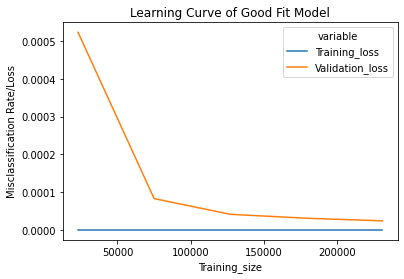

In [31]:
lc = learn_curve(X_train5,y_train5,1,cat) # cat
print_graph(lc)

#### 10.4 Light + Params

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
# clf = lgb.LGBMClassifier(max_depth = -1, random_state = 314, silent = True, metric = 'None', n_jobs = 4, n_estimators = 5000)
clf = lgb.LGBMClassifier()


light_search = RandomizedSearchCV( 
    estimator = clf, param_distributions = param_test, 
    n_iter = 100,
    refit = True,
    random_state = 314,
    verbose = True)

In [ ]:
light_search.fit(X_train5, y_train5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 301.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                                                             10000.0],
                                        'num_leaves': 

In [ ]:
light_search.best_params_

{'colsample_bytree': 0.404828563763895,
 'min_child_samples': 350,
 'min_child_weight': 0.001,
 'num_leaves': 36,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'subsample': 0.9274016358891894}

In [ ]:
print ("Best Estimator : " , light_search.best_estimator_)
print ("Best Params : " , light_search.best_params_)
print ("Best Score : " , light_search.best_score_)

Best Estimator :  LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6810492267417421, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=272,
               min_child_weight=1, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=26, objective=None, random_state=None,
               reg_alpha=0.1, reg_lambda=0.1, silent=True,
               subsample=0.48511105572491486, subsample_for_bin=200000,
               subsample_freq=0)
Best Params :  {'colsample_bytree': 0.6810492267417421, 'min_child_samples': 272, 'min_child_weight': 1, 'num_leaves': 26, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.48511105572491486}
Best Score :  0.9999926416482708


In [ ]:
light = lgb.LGBMClassifier()

In [ ]:
# Best Params :  {'colsample_bytree': 0.6810492267417421, 'min_child_samples': 272, 'min_child_weight': 1,
#                'num_leaves': 26, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.48511105572491486}

In [ ]:
light = lgb.LGBMClassifier (colsample_bytree = 0.404828563763895,
                      min_child_samples = 350,
                      min_child_weight = 0.001,
                      num_leaves = 36,
                      reg_alpha = 1,
                      reg_lambda = 5,
                      subsample = 0.9274016358891894 )

build_model(light, X_train5 , y_train5 , X_test5 , y_test5)
light_train_param , light_test_param = save_model(light,'light_model_para', X_train5 , y_train5 , X_test5 , y_test5)


Cross Validation Accuracies:
-------------------------
[1.0, 0.9999826725810923, 1.0, 0.9999653451621846, 1.0]

    Mean Cross Validation Accuracy:
-------------------------
0.9999896035486554

    Standard Deviation of Cross Validation Accuracy:
-------------------------
1.3861935126158188e-05

    Training Accuracy:
---------------
1.0




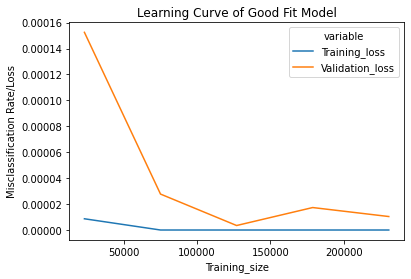

In [34]:
lc = learn_curve(X_train5,y_train5,1,light) # light
print_graph(lc)